
Dataset Loaded Successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

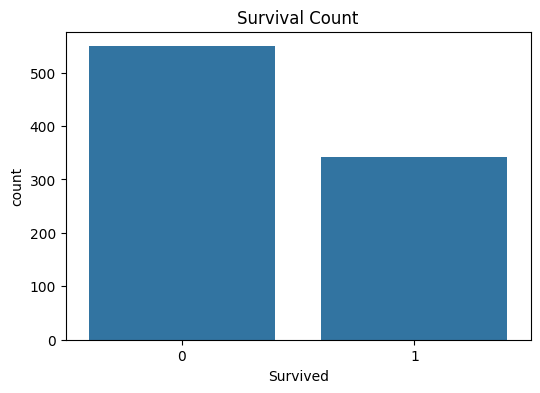

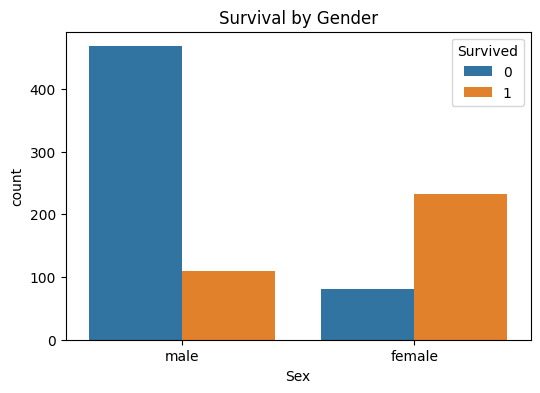

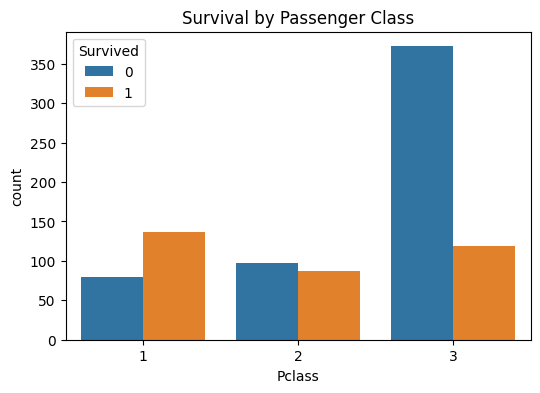

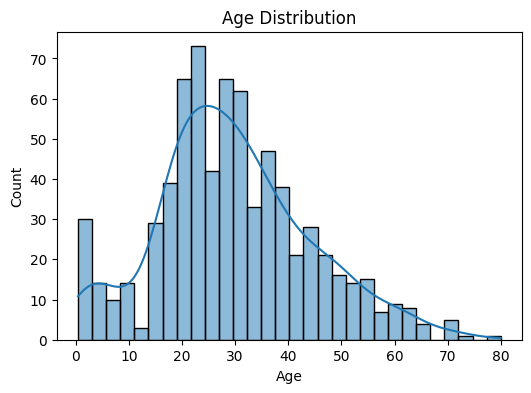

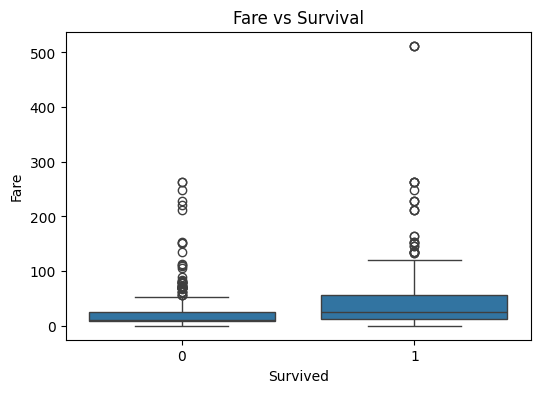


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Feature Engineered Columns Added

Categorical Variables Encoded
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         2   
1            2         1       1    0  38.0      1      0  71.2833         0   
2            3         1       3    0  26.0      0      0   7.9250         2   
3            4         1       1    0  35.0      1      0  53.1000         2   
4            5         0       3    1  35.0      0      0   8.0500         2   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1  

Features Used for Training:
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
     

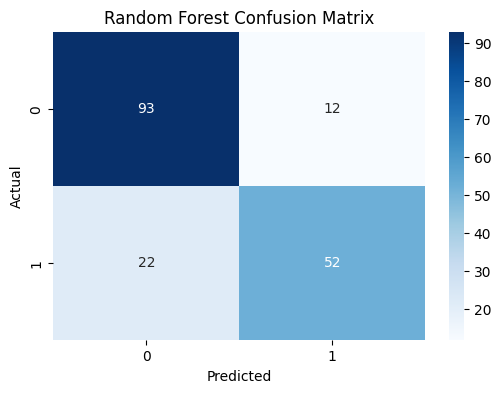


Cross Validation Scores: [0.84615385 0.83916084 0.80985915 0.79577465 0.82394366]
Mean CV Accuracy: 0.8229784300206836

Feature Importance:
       Feature  Importance
2          Sex    0.369996
6         Fare    0.166883
3          Age    0.123640
0  PassengerId    0.100338
1       Pclass    0.100267
8   FamilySize    0.056156
4        SibSp    0.028539
7     Embarked    0.024387
5        Parch    0.020066
9      IsAlone    0.009729


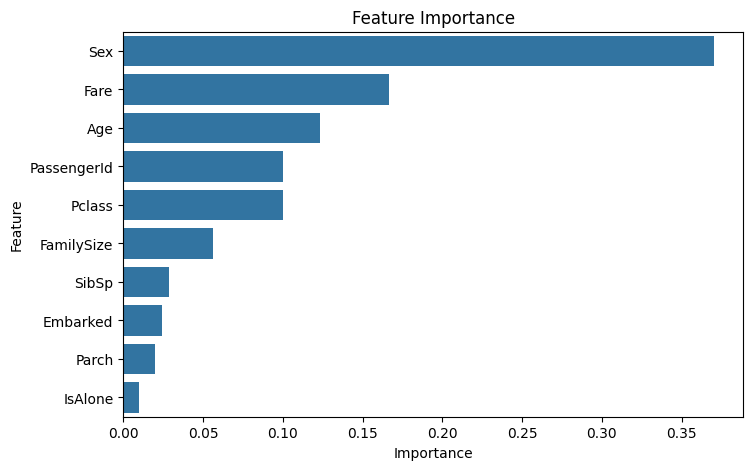


New Passenger Prediction:
Did Not Survive

PROJECT COMPLETED SUCCESSFULLY!

- Data Cleaning ✔
- Feature Engineering ✔
- Logistic Regression ✔
- Random Forest ✔
- Evaluation ✔
- Prediction ✔



In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


# 2. LOAD DATASET
# ------------------------------------------------------------
data_path = "Titanic-Dataset.csv"
df = pd.read_csv(data_path)

print("\nDataset Loaded Successfully!")
print(df.head())


# 3. DATA UNDERSTANDING
# ------------------------------------------------------------
print("\nDataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------------------

# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()


# 5. DATA CLEANING
# ------------------------------------------------------------

# Drop columns with too many missing values or no predictive power
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


# 6. FEATURE ENGINEERING
# ------------------------------------------------------------

# Create Family Size feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Create IsAlone feature
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

print("\nFeature Engineered Columns Added")


# 7. ENCODING CATEGORICAL VARIABLES
# ------------------------------------------------------------
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

print("\nCategorical Variables Encoded")
print(df.head())


# 8. FEATURE SELECTION
# ------------------------------------------------------------
X = df.drop("Survived", axis=1)
y = df["Survived"]

print("\nFeatures Used for Training:")
print(X.columns)


# 9. TRAIN TEST SPLIT
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain-Test Split Completed")


# 10. FEATURE SCALING
# ------------------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 11. MODEL 1 – LOGISTIC REGRESSION
# ------------------------------------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


# 12. MODEL 2 – RANDOM FOREST
# ------------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# 13. CONFUSION MATRIX VISUALIZATION
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# 14. CROSS VALIDATION
# ------------------------------------------------------------
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nCross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


# 15. FEATURE IMPORTANCE
# ------------------------------------------------------------
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()


# 16. PREDICTION ON NEW PASSENGER
# ------------------------------------------------------------
new_passenger = pd.DataFrame({
    "PassengerId": [999],
    "Pclass": [3],
    "Sex": [1],        # male
    "Age": [30],
    "SibSp": [0],
    "Parch": [0],
    "Fare": [8.05],
    "Embarked": [2],  # S
    "FamilySize": [1],
    "IsAlone": [1]
})

new_passenger_scaled = scaler.transform(new_passenger)
prediction = rf_model.predict(new_passenger_scaled)

print("\nNew Passenger Prediction:")
print("Survived" if prediction[0] == 1 else "Did Not Survive")


# 17. FINAL CONCLUSION
# ------------------------------------------------------------
print("""
PROJECT COMPLETED SUCCESSFULLY!

- Data Cleaning ✔
- Feature Engineering ✔
- Logistic Regression ✔
- Random Forest ✔
- Evaluation ✔
- Prediction ✔
""")
